In [168]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import datetime
import operator

In [169]:
columns_corn = [ 'Date',
            'Corn Price',
            'CPI',
           	'GPR	Country',
            'GPR',
           	'US Wheat Futures',
           	'Brent Oil Futures',
           	'London Wheat Futures',
           	'Exch Rate',
             'T',
             'TM',
             'Tm',
             'H',
             'PP',
           	 'VV',
             'V',
             'VM',
             'RA',
           	 'SN',
             'TS',
             'FG'  ]

columns_barley = [ 'Date',
            'Barley Price',
            'CPI',
           	'GPR	Country',
            'GPR',
           	'US Wheat Futures',
           	'Brent Oil Futures',
           	'London Wheat Futures',
           	'Exch Rate',
             'T',
             'TM',
             'Tm',
             'H',
             'PP',
           	 'VV',
             'V',
             'VM',
             'RA',
           	 'SN',
             'TS',
             'FG'  ]

df_corn = pd.read_excel('Corn Data.xlsx', header = None, skiprows = 1, names = columns_corn)
df_barley = pd.read_excel('Barley Data.xlsx', header = None, skiprows = 1, names = columns_barley)

In [170]:
df_corn.head()

,Date,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,...,Tm,H,PP,VV,V,VM,RA,SN,TS,FG
0,2022-02-25,7900,141.7,178.90,322,843.00,97.93,231.00,30.0500,1.100,...,-2.5,78.775,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0
1,2022-02-18,7750,141.7,178.90,322,797.00,93.54,222.50,28.4014,1.100,...,-2.5,78.775,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0
2,2022-02-11,7650,141.7,178.90,322,797.75,94.44,221.05,28.0414,1.100,...,-2.5,78.775,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0
3,2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,1.100,...,-2.5,78.775,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0
4,2022-01-28,7750,137.6,140.83,177,786.25,90.03,221.00,28.6918,-1.925,...,-5.1,82.325,51.3725,9.225,16.625,30.3,10.5,20.5,0.0,1.5


In [171]:
df_corn.tail()

,Date,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,...,Tm,H,PP,VV,V,VM,RA,SN,TS,FG
629,2010-01-29,1230,98.4,91.58,1,473.13,71.46,99.85,8.050,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75
630,2010-01-22,1240,98.4,91.58,1,498.13,72.83,100.85,8.110,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75
631,2010-01-15,1250,98.4,91.58,1,509.88,77.11,104.00,8.125,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75
632,2010-01-08,1240,98.4,91.58,1,568.13,81.37,109.25,8.075,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75
633,2010-01-01,1240,98.4,91.58,1,540.75,80.12,110.45,8.050,-9.375,...,-14.2,84.65,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75


In [172]:
df_barley.head()

,Date,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,...,Tm,H,PP,VV,V,VM,RA,SN,TS,FG
0,2022-02-25,7650,141.7,178.90,322,843.00,97.93,231.00,30.0500,2.65,...,-1.9,79.350,6.0325,8.725,12.95,25.9,9.50,4.75,0.0,7.25
1,2022-02-18,7650,141.7,178.90,322,797.00,93.54,222.50,28.4014,2.65,...,-1.9,79.350,6.0325,8.725,12.95,25.9,9.50,4.75,0.0,7.25
2,2022-02-11,7600,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.65,...,-1.9,79.350,6.0325,8.725,12.95,25.9,9.50,4.75,0.0,7.25
3,2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.65,...,-1.9,79.350,6.0325,8.725,12.95,25.9,9.50,4.75,0.0,7.25
4,2022-01-28,7600,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.15,...,-5.9,83.425,12.3825,8.100,16.75,31.0,11.25,16.75,0.0,6.00


In [173]:
df_barley.tail()

,Date,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,...,Tm,H,PP,VV,V,VM,RA,SN,TS,FG
629,2010-01-29,850,98.4,91.58,1,473.13,71.46,99.85,8.050,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0
630,2010-01-22,860,98.4,91.58,1,498.13,72.83,100.85,8.110,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0
631,2010-01-15,880,98.4,91.58,1,509.88,77.11,104.00,8.125,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0
632,2010-01-08,880,98.4,91.58,1,568.13,81.37,109.25,8.075,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0
633,2010-01-01,880,98.4,91.58,1,540.75,80.12,110.45,8.050,-5.125,...,-9.6,88.925,52.84,6.375,17.1,30.2,9.25,14.5,0.25,11.0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

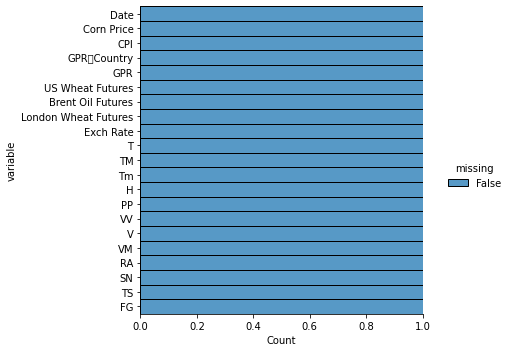

In [174]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df_corn.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 720x432 with 0 Axes>

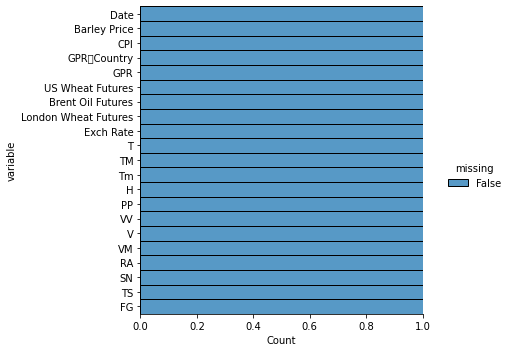

In [175]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df_barley.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)

In [176]:
df_corn.index = df_corn["Date"]
df_corn.index = pd.to_datetime(df_corn.index)
df_corn.drop(['Date'], axis='columns', inplace=True)
df_corn = df_corn.sort_index()

In [177]:
df_barley.index = df_barley["Date"]
df_barley.index = pd.to_datetime(df_barley.index)
df_barley.drop(['Date'], axis='columns', inplace=True)
df_barley = df_barley.sort_index()

In [178]:
df_corn["Exchange Rate Change 1"] = df_corn["Exch Rate"].pct_change(periods=1)*100
df_corn["Exchange Rate Change 4"] = df_corn["Exch Rate"].pct_change(periods=4)*100

In [179]:
df_corn.head()

,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,1240,98.4,91.58,1,540.75,80.12,110.45,8.050,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,NaN,NaN
2010-01-08,1240,98.4,91.58,1,568.13,81.37,109.25,8.075,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,0.310559,NaN
2010-01-15,1250,98.4,91.58,1,509.88,77.11,104.00,8.125,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,0.619195,NaN
2010-01-22,1240,98.4,91.58,1,498.13,72.83,100.85,8.110,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,-0.184615,NaN
2010-01-29,1230,98.4,91.58,1,473.13,71.46,99.85,8.050,-9.375,-6.2,...,47.18,6.95,13.825,21.4,5.25,16.75,0.0,4.75,-0.739827,0.0


In [180]:
df_corn.tail()

,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2022-01-28,7750,137.6,140.83,177,786.25,90.03,221.00,28.6918,-1.925,1.2,...,51.3725,9.225,16.625,30.3,10.5,20.5,0.0,1.5,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0,-2.013816,2.250203
2022-02-11,7650,141.7,178.90,322,797.75,94.44,221.05,28.0414,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0,-0.258234,0.149288
2022-02-18,7750,141.7,178.90,322,797.00,93.54,222.50,28.4014,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0,1.283816,0.709542
2022-02-25,7900,141.7,178.90,322,843.00,97.93,231.00,30.0500,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.0,0.0,1.0,5.804643,4.733757


In [181]:
df_barley["Exchange Rate Change 1"] = df_barley["Exch Rate"].pct_change(periods=1)*100
df_barley["Exchange Rate Change 4"] = df_barley["Exch Rate"].pct_change(periods=4)*100

In [182]:
df_barley

,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,880,98.4,91.58,1,540.75,80.12,110.45,8.0500,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,NaN,NaN
2010-01-08,880,98.4,91.58,1,568.13,81.37,109.25,8.0750,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,0.310559,NaN
2010-01-15,880,98.4,91.58,1,509.88,77.11,104.00,8.1250,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,0.619195,NaN
2010-01-22,860,98.4,91.58,1,498.13,72.83,100.85,8.1100,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,-0.184615,NaN
2010-01-29,850,98.4,91.58,1,473.13,71.46,99.85,8.0500,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,-0.739827,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,7600,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.150,3.8,...,12.3825,8.100,16.75,31.0,11.25,16.75,0.00,6.00,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.650,7.9,...,6.0325,8.725,12.95,25.9,9.50,4.75,0.00,7.25,-2.013816,2.250203
2022-02-11,7600,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.650,7.9,...,6.0325,8.725,12.95,25.9,9.50,4.75,0.00,7.25,-0.258234,0.149288


In [183]:
df_barley

,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,880,98.4,91.58,1,540.75,80.12,110.45,8.0500,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,NaN,NaN
2010-01-08,880,98.4,91.58,1,568.13,81.37,109.25,8.0750,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,0.310559,NaN
2010-01-15,880,98.4,91.58,1,509.88,77.11,104.00,8.1250,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,0.619195,NaN
2010-01-22,860,98.4,91.58,1,498.13,72.83,100.85,8.1100,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,-0.184615,NaN
2010-01-29,850,98.4,91.58,1,473.13,71.46,99.85,8.0500,-5.125,-0.2,...,52.8400,6.375,17.10,30.2,9.25,14.50,0.25,11.00,-0.739827,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,7600,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.150,3.8,...,12.3825,8.100,16.75,31.0,11.25,16.75,0.00,6.00,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.650,7.9,...,6.0325,8.725,12.95,25.9,9.50,4.75,0.00,7.25,-2.013816,2.250203
2022-02-11,7600,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.650,7.9,...,6.0325,8.725,12.95,25.9,9.50,4.75,0.00,7.25,-0.258234,0.149288


In [184]:
df_corn = df_corn.dropna()
df_barley = df_barley.dropna()

In [185]:
X_train_corn, X_test_corn = train_test_split(df_corn, train_size=0.8, shuffle=False)
X_train_barley, X_test_barley = train_test_split(df_barley, train_size=0.8, shuffle=False)

In [186]:
X_train_corn

,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,1230,98.4,91.58,1,473.13,71.46,99.85,8.0500,-9.375,-6.2,...,47.1800,6.950,13.825,21.4,5.25,16.75,0.00,4.75,-0.739827,0.000000
2010-02-05,1210,94.0,80.73,6,474.13,69.59,100.30,8.0700,-3.850,-1.1,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,0.248447,-0.061920
2010-02-12,1220,94.0,80.73,6,485.63,72.90,98.00,8.0600,-3.850,-1.1,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.123916,-0.800000
2010-02-19,1240,94.0,80.73,6,488.88,78.19,95.40,8.0430,-3.850,-1.1,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.210918,-0.826141
2010-02-26,1240,94.0,80.73,6,519.13,77.59,96.50,8.0220,-3.850,-1.1,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.261097,-0.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,4100,93.2,103.40,15,451.25,60.43,133.10,25.1100,20.325,27.6,...,24.8300,10.900,9.575,20.7,7.00,0.00,2.75,0.50,0.039841,-1.779777
2019-09-06,3600,92.4,90.37,23,460.25,61.54,135.85,25.0750,15.225,22.4,...,25.5875,10.850,10.975,22.7,8.75,0.00,1.00,1.00,-0.139387,-0.570210
2019-09-13,3550,92.4,90.37,23,485.75,60.22,136.05,24.7913,15.225,22.4,...,25.5875,10.850,10.975,22.7,8.75,0.00,1.00,1.00,-1.131406,-1.543685


In [187]:
X_test_corn

,Corn Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-04,3600,96.5,97.84,34,490.50,58.37,138.80,24.7700,10.275,16.0,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,2.732340,-1.216351
2019-10-11,3600,96.5,97.84,34,508.00,60.51,137.35,24.6500,10.275,16.0,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,-0.484457,-0.569958
2019-10-18,3650,96.5,97.84,34,532.25,59.42,137.75,25.0802,10.275,16.0,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,1.745233,2.766646
2019-10-25,3700,96.5,97.84,34,517.75,62.02,139.85,25.0800,10.275,16.0,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,-0.000797,4.018050
2019-11-01,3900,96.1,73.08,31,516.00,61.69,140.30,24.8694,4.350,8.2,...,28.3775,7.700,12.025,24.5,13.0,1.25,0.25,11.00,-0.839713,0.401292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,7750,137.6,140.83,177,786.25,90.03,221.00,28.6918,-1.925,1.2,...,51.3725,9.225,16.625,30.3,10.5,20.50,0.00,1.50,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.00,0.00,1.00,-2.013816,2.250203
2022-02-11,7650,141.7,178.90,322,797.75,94.44,221.05,28.0414,1.100,4.9,...,19.1775,10.100,12.775,23.4,9.5,6.00,0.00,1.00,-0.258234,0.149288


In [188]:
X_train_barley

,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,850,98.4,91.58,1,473.13,71.46,99.85,8.0500,-5.125,-0.2,...,52.8400,6.375,17.100,30.2,9.25,14.50,0.25,11.00,-0.739827,0.000000
2010-02-05,845,94.0,80.73,6,474.13,69.59,100.30,8.0700,-1.400,2.3,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,0.248447,-0.061920
2010-02-12,850,94.0,80.73,6,485.63,72.90,98.00,8.0600,-1.400,2.3,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.123916,-0.800000
2010-02-19,870,94.0,80.73,6,488.88,78.19,95.40,8.0430,-1.400,2.3,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.210918,-0.826141
2010-02-26,860,94.0,80.73,6,519.13,77.59,96.50,8.0220,-1.400,2.3,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.261097,-0.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,4300,93.2,103.40,15,451.25,60.43,133.10,25.1100,22.725,30.7,...,30.8575,10.000,13.150,25.9,5.00,0.00,2.00,0.50,0.039841,-1.779777
2019-09-06,4000,92.4,90.37,23,460.25,61.54,135.85,25.0750,17.575,25.1,...,9.9675,9.975,12.675,26.4,6.00,0.00,1.00,1.75,-0.139387,-0.570210
2019-09-13,4000,92.4,90.37,23,485.75,60.22,136.05,24.7913,17.575,25.1,...,9.9675,9.975,12.675,26.4,6.00,0.00,1.00,1.75,-1.131406,-1.543685


In [189]:
X_test_barley

,Barley Price,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-04,4000,96.5,97.84,34,490.50,58.37,138.80,24.7700,11.475,16.9,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,2.732340,-1.216351
2019-10-11,4000,96.5,97.84,34,508.00,60.51,137.35,24.6500,11.475,16.9,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,-0.484457,-0.569958
2019-10-18,4000,96.5,97.84,34,532.25,59.42,137.75,25.0802,11.475,16.9,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,1.745233,2.766646
2019-10-25,4100,96.5,97.84,34,517.75,62.02,139.85,25.0800,11.475,16.9,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,-0.000797,4.018050
2019-11-01,4100,96.1,73.08,31,516.00,61.69,140.30,24.8694,6.700,12.4,...,20.9500,7.600,16.775,28.7,9.50,0.50,0.00,12.50,-0.839713,0.401292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,7600,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.150,3.8,...,12.3825,8.100,16.750,31.0,11.25,16.75,0.00,6.00,1.739282,5.291009
2022-02-04,7700,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.650,7.9,...,6.0325,8.725,12.950,25.9,9.50,4.75,0.00,7.25,-2.013816,2.250203
2022-02-11,7600,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.650,7.9,...,6.0325,8.725,12.950,25.9,9.50,4.75,0.00,7.25,-0.258234,0.149288


In [190]:
y_train_corn = X_train_corn.pop('Corn Price')
y_test_corn = X_test_corn.pop('Corn Price')
y_train_barley = X_train_barley.pop('Barley Price')
y_test_barley = X_test_barley.pop('Barley Price')

In [191]:
y_train_corn

Date
2010-01-29    1230
2010-02-05    1210
2010-02-12    1220
2010-02-19    1240
2010-02-26    1240
              ... 
2019-08-30    4100
2019-09-06    3600
2019-09-13    3550
2019-09-20    3550
2019-09-27    3550
Name: Corn Price, Length: 504, dtype: int64

In [192]:
X_train_corn

,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,Tm,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,98.4,91.58,1,473.13,71.46,99.85,8.0500,-9.375,-6.2,-14.2,...,47.1800,6.950,13.825,21.4,5.25,16.75,0.00,4.75,-0.739827,0.000000
2010-02-05,94.0,80.73,6,474.13,69.59,100.30,8.0700,-3.850,-1.1,-6.8,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,0.248447,-0.061920
2010-02-12,94.0,80.73,6,485.63,72.90,98.00,8.0600,-3.850,-1.1,-6.8,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.123916,-0.800000
2010-02-19,94.0,80.73,6,488.88,78.19,95.40,8.0430,-3.850,-1.1,-6.8,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.210918,-0.826141
2010-02-26,94.0,80.73,6,519.13,77.59,96.50,8.0220,-3.850,-1.1,-6.8,...,59.3700,6.325,13.250,22.6,7.00,14.50,0.00,6.75,-0.261097,-0.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,93.2,103.40,15,451.25,60.43,133.10,25.1100,20.325,27.6,11.7,...,24.8300,10.900,9.575,20.7,7.00,0.00,2.75,0.50,0.039841,-1.779777
2019-09-06,92.4,90.37,23,460.25,61.54,135.85,25.0750,15.225,22.4,7.2,...,25.5875,10.850,10.975,22.7,8.75,0.00,1.00,1.00,-0.139387,-0.570210
2019-09-13,92.4,90.37,23,485.75,60.22,136.05,24.7913,15.225,22.4,7.2,...,25.5875,10.850,10.975,22.7,8.75,0.00,1.00,1.00,-1.131406,-1.543685


In [193]:
y_test_corn

Date
2019-10-04    3600
2019-10-11    3600
2019-10-18    3650
2019-10-25    3700
2019-11-01    3900
              ... 
2022-01-28    7750
2022-02-04    7700
2022-02-11    7650
2022-02-18    7750
2022-02-25    7900
Name: Corn Price, Length: 126, dtype: int64

In [194]:
X_test_corn

,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,Tm,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-04,96.5,97.84,34,490.50,58.37,138.80,24.7700,10.275,16.0,4.3,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,2.732340,-1.216351
2019-10-11,96.5,97.84,34,508.00,60.51,137.35,24.6500,10.275,16.0,4.3,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,-0.484457,-0.569958
2019-10-18,96.5,97.84,34,532.25,59.42,137.75,25.0802,10.275,16.0,4.3,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,1.745233,2.766646
2019-10-25,96.5,97.84,34,517.75,62.02,139.85,25.0800,10.275,16.0,4.3,...,25.6550,8.300,9.275,18.6,7.0,0.50,0.75,8.75,-0.000797,4.018050
2019-11-01,96.1,73.08,31,516.00,61.69,140.30,24.8694,4.350,8.2,0.5,...,28.3775,7.700,12.025,24.5,13.0,1.25,0.25,11.00,-0.839713,0.401292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,137.6,140.83,177,786.25,90.03,221.00,28.6918,-1.925,1.2,-5.1,...,51.3725,9.225,16.625,30.3,10.5,20.50,0.00,1.50,1.739282,5.291009
2022-02-04,141.7,178.90,322,763.25,93.27,217.55,28.1140,1.100,4.9,-2.5,...,19.1775,10.100,12.775,23.4,9.5,6.00,0.00,1.00,-2.013816,2.250203
2022-02-11,141.7,178.90,322,797.75,94.44,221.05,28.0414,1.100,4.9,-2.5,...,19.1775,10.100,12.775,23.4,9.5,6.00,0.00,1.00,-0.258234,0.149288


In [195]:
y_train_barley

Date
2010-01-29     850
2010-02-05     845
2010-02-12     850
2010-02-19     870
2010-02-26     860
              ... 
2019-08-30    4300
2019-09-06    4000
2019-09-13    4000
2019-09-20    4000
2019-09-27    4000
Name: Barley Price, Length: 504, dtype: int64

In [196]:
X_train_barley

,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,Tm,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-29,98.4,91.58,1,473.13,71.46,99.85,8.0500,-5.125,-0.2,-9.6,...,52.8400,6.375,17.100,30.2,9.25,14.50,0.25,11.00,-0.739827,0.000000
2010-02-05,94.0,80.73,6,474.13,69.59,100.30,8.0700,-1.400,2.3,-5.1,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,0.248447,-0.061920
2010-02-12,94.0,80.73,6,485.63,72.90,98.00,8.0600,-1.400,2.3,-5.1,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.123916,-0.800000
2010-02-19,94.0,80.73,6,488.88,78.19,95.40,8.0430,-1.400,2.3,-5.1,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.210918,-0.826141
2010-02-26,94.0,80.73,6,519.13,77.59,96.50,8.0220,-1.400,2.3,-5.1,...,53.8450,7.100,17.600,31.0,13.25,9.75,0.25,8.75,-0.261097,-0.347826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-30,93.2,103.40,15,451.25,60.43,133.10,25.1100,22.725,30.7,15.2,...,30.8575,10.000,13.150,25.9,5.00,0.00,2.00,0.50,0.039841,-1.779777
2019-09-06,92.4,90.37,23,460.25,61.54,135.85,25.0750,17.575,25.1,10.1,...,9.9675,9.975,12.675,26.4,6.00,0.00,1.00,1.75,-0.139387,-0.570210
2019-09-13,92.4,90.37,23,485.75,60.22,136.05,24.7913,17.575,25.1,10.1,...,9.9675,9.975,12.675,26.4,6.00,0.00,1.00,1.75,-1.131406,-1.543685


In [197]:
y_test_barley

Date
2019-10-04    4000
2019-10-11    4000
2019-10-18    4000
2019-10-25    4100
2019-11-01    4100
              ... 
2022-01-28    7600
2022-02-04    7700
2022-02-11    7600
2022-02-18    7650
2022-02-25    7650
Name: Barley Price, Length: 126, dtype: int64

In [198]:
X_test_barley

,CPI,GPR\tCountry,GPR,US Wheat Futures,Brent Oil Futures,London Wheat Futures,Exch Rate,T,TM,Tm,...,PP,VV,V,VM,RA,SN,TS,FG,Exchange Rate Change 1,Exchange Rate Change 4
Date,,,,,,,,,,,,,,,,,,,,,
2019-10-04,96.5,97.84,34,490.50,58.37,138.80,24.7700,11.475,16.9,6.2,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,2.732340,-1.216351
2019-10-11,96.5,97.84,34,508.00,60.51,137.35,24.6500,11.475,16.9,6.2,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,-0.484457,-0.569958
2019-10-18,96.5,97.84,34,532.25,59.42,137.75,25.0802,11.475,16.9,6.2,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,1.745233,2.766646
2019-10-25,96.5,97.84,34,517.75,62.02,139.85,25.0800,11.475,16.9,6.2,...,38.2275,7.275,10.075,21.3,10.50,0.00,0.75,14.75,-0.000797,4.018050
2019-11-01,96.1,73.08,31,516.00,61.69,140.30,24.8694,6.700,12.4,1.4,...,20.9500,7.600,16.775,28.7,9.50,0.50,0.00,12.50,-0.839713,0.401292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-28,137.6,140.83,177,786.25,90.03,221.00,28.6918,0.150,3.8,-5.9,...,12.3825,8.100,16.750,31.0,11.25,16.75,0.00,6.00,1.739282,5.291009
2022-02-04,141.7,178.90,322,763.25,93.27,217.55,28.1140,2.650,7.9,-1.9,...,6.0325,8.725,12.950,25.9,9.50,4.75,0.00,7.25,-2.013816,2.250203
2022-02-11,141.7,178.90,322,797.75,94.44,221.05,28.0414,2.650,7.9,-1.9,...,6.0325,8.725,12.950,25.9,9.50,4.75,0.00,7.25,-0.258234,0.149288


#**CART - кукурудза**

In [199]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

SEED = 1

In [200]:
max_depth = [2,3,4,5]
min_samples_leaf = [0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.2]
i=0
dt_dict = {}

for max_depth_ in max_depth:
  for min_samples_leaf_ in min_samples_leaf:
    i=i+1
    dt = DecisionTreeRegressor(max_depth=max_depth_, min_samples_leaf=min_samples_leaf_, random_state=1)
    model_dt=dt.fit(X_train_corn,y_train_corn)
    y_dt_pred = model_dt.predict(X_train_corn)
    rmse=np.sqrt(mean_squared_error(y_train_corn,y_dt_pred))
    print('Модель '+str(i) + ': max_depth='+str(max_depth_)+' min_samples_leaf_='+str(min_samples_leaf_)+' RMSE='+str(rmse))
    dt_dict[i]=rmse


Модель 1: max_depth=2 min_samples_leaf_=0.02 RMSE=305.2789402705086
Модель 2: max_depth=2 min_samples_leaf_=0.04 RMSE=305.2789402705086
Модель 3: max_depth=2 min_samples_leaf_=0.06 RMSE=305.2789402705086
Модель 4: max_depth=2 min_samples_leaf_=0.08 RMSE=310.94713866246985
Модель 5: max_depth=2 min_samples_leaf_=0.1 RMSE=319.4238548649915
Модель 6: max_depth=2 min_samples_leaf_=0.12 RMSE=373.6071913453087
Модель 7: max_depth=2 min_samples_leaf_=0.14 RMSE=380.64994908174305
Модель 8: max_depth=2 min_samples_leaf_=0.16 RMSE=380.64994908174305
Модель 9: max_depth=2 min_samples_leaf_=0.18 RMSE=380.64994908174305
Модель 10: max_depth=2 min_samples_leaf_=0.2 RMSE=391.8810710087636
Модель 11: max_depth=3 min_samples_leaf_=0.02 RMSE=236.11130193001344
Модель 12: max_depth=3 min_samples_leaf_=0.04 RMSE=242.59018435343552
Модель 13: max_depth=3 min_samples_leaf_=0.06 RMSE=245.1322136345321
Модель 14: max_depth=3 min_samples_leaf_=0.08 RMSE=246.60986599510767
Модель 15: max_depth=3 min_samples_lea

In [201]:
dt_dict

{1: 305.2789402705086,
 2: 305.2789402705086,
 3: 305.2789402705086,
 4: 310.94713866246985,
 5: 319.4238548649915,
 6: 373.6071913453087,
 7: 380.64994908174305,
 8: 380.64994908174305,
 9: 380.64994908174305,
 10: 391.8810710087636,
 11: 236.11130193001344,
 12: 242.59018435343552,
 13: 245.1322136345321,
 14: 246.60986599510767,
 15: 258.9968664219018,
 16: 337.7510463865388,
 17: 356.71121026501083,
 18: 367.9479984298272,
 19: 380.64994908174305,
 20: 391.8810710087636,
 21: 194.91250971894925,
 22: 214.17809320837867,
 23: 219.58934534576034,
 24: 223.8970692233546,
 25: 247.48132005558946,
 26: 337.7510463865388,
 27: 356.71121026501083,
 28: 367.9479984298272,
 29: 380.64994908174305,
 30: 391.8810710087636,
 31: 167.8642850257304,
 32: 195.41510144794037,
 33: 215.3497238653889,
 34: 221.60223809292924,
 35: 247.48132005558946,
 36: 337.7510463865388,
 37: 356.71121026501083,
 38: 367.9479984298272,
 39: 380.64994908174305,
 40: 391.8810710087636}

In [202]:
dt_dict_for_plot = pd.DataFrame()
dt_dict_for_plot['RMSE'] = list(dt_dict.values())
dt_dict_for_plot['ind'] = list(dt_dict.keys())
dt_dict_for_plot['ind'] = dt_dict_for_plot['ind'].astype(str)
dt_dict_for_plot = dt_dict_for_plot.sort_values(by='RMSE')
dt_dict_for_plot

,RMSE,ind
30,167.864285,31
20,194.912510,21
31,195.415101,32
21,214.178093,22
32,215.349724,33
22,219.589345,23
33,221.602238,34
23,223.897069,24
10,236.111302,11
11,242.590184,12


In [203]:
profit_color = [{r<168: 'blue', r>=168: 'orange'}[True] for r in dt_dict_for_plot['RMSE']]

Text(0, 0.5, 'RMSE')

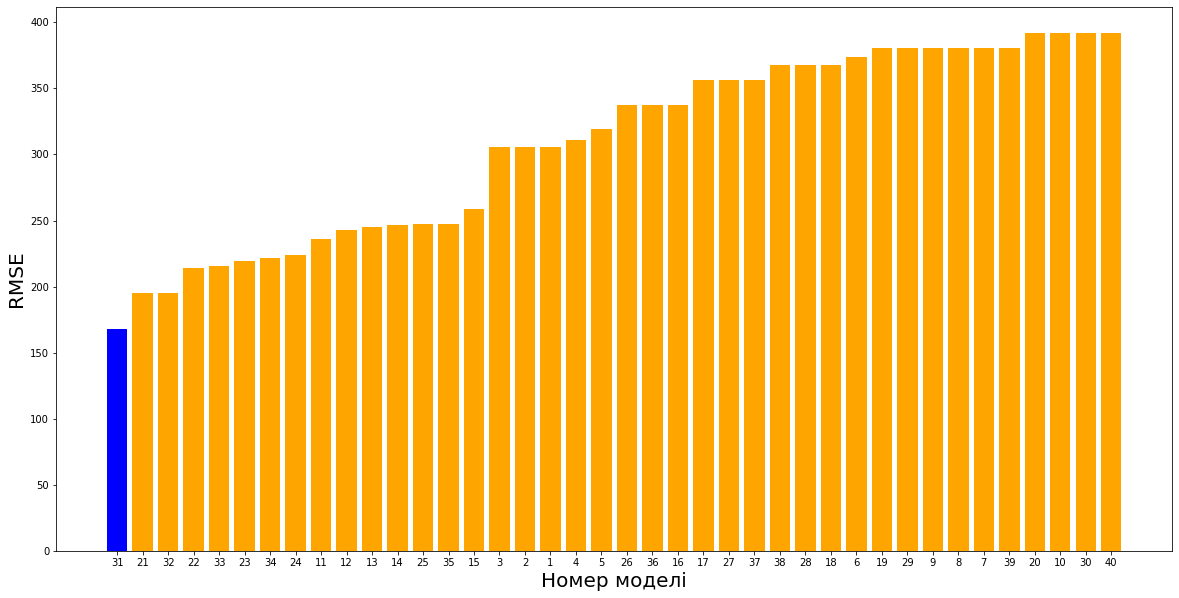

In [204]:
fig,ax=plt.subplots(figsize=(20,10))

ax.bar(dt_dict_for_plot['ind'],dt_dict_for_plot['RMSE'], color=profit_color)
ax.set_xlabel('Номер моделі', fontsize=20)
ax.set_ylabel('RMSE' ,fontsize=20)

In [205]:
max_depth=5
min_samples_leaf_=0.02

dt = DecisionTreeRegressor(max_depth=max_depth_, min_samples_leaf=min_samples_leaf_, random_state=1)
model_dt=dt.fit(X_train_corn,y_train_corn)
y_dt_pred = model_dt.predict(X_train_corn)
rmse=np.sqrt(mean_squared_error(y_train_corn,y_dt_pred))
print('max_depth='+str(max_depth_)+' min_samples_leaf_='+str(min_samples_leaf_)+' RMSE='+str(rmse))

max_depth=5 min_samples_leaf_=0.02 RMSE=167.8642850257304


In [206]:
corn_results_train = pd.DataFrame(y_train_corn.copy())
corn_results_train['pred'] = pd.DataFrame(y_dt_pred)[0].values
corn_results_train

,Corn Price,pred
Date,,
2010-01-29,1230,1161.041667
2010-02-05,1210,1161.041667
2010-02-12,1220,1161.041667
2010-02-19,1240,1161.041667
2010-02-26,1240,1161.041667
...,...,...
2019-08-30,4100,4215.000000
2019-09-06,3600,4215.000000
2019-09-13,3550,4215.000000


Text(0, 0.5, 'Ціна на кукурудзу')

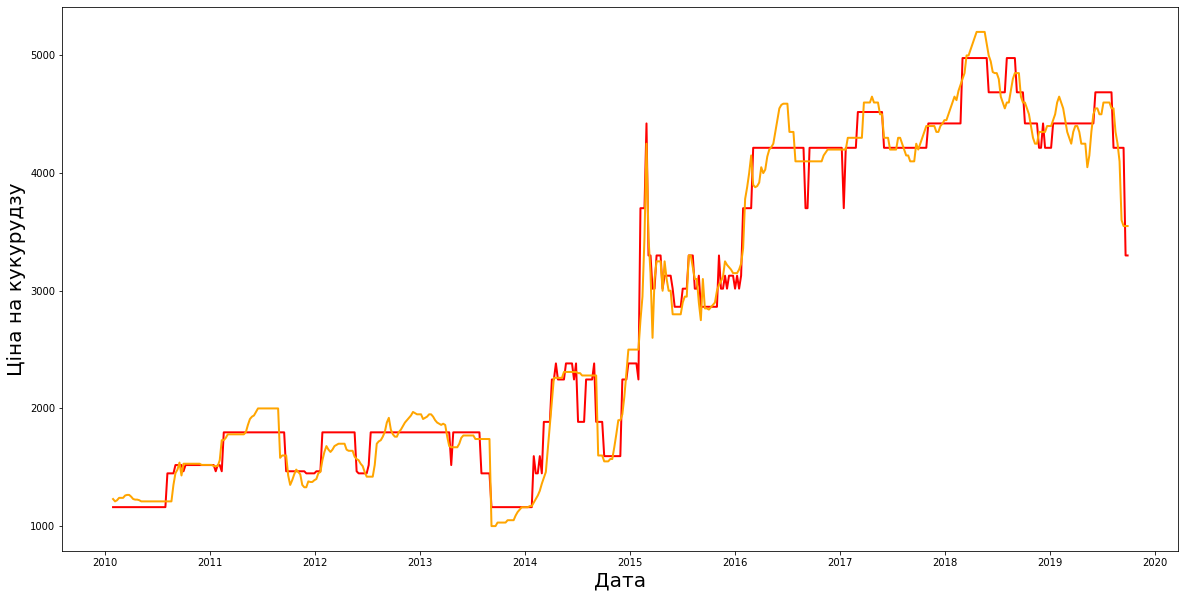

In [207]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(corn_results_train.index,corn_results_train['pred'], color='red', linewidth=2, label = 'Значення, підібране моделлю')
ax.plot(corn_results_train.index,corn_results_train['Corn Price'], color='orange', linewidth=2, label = 'Фактична ціна')

ax.set_xlabel('Дата', fontsize=20)
ax.set_ylabel('Ціна на кукурудзу' ,fontsize=20)

In [208]:
max_depth = [2,3,4]
min_samples_leaf = [0.08,0.10,0.12,0.14,0.16,0.18,0.2]
i=0
dt_dict = {}

for max_depth_ in max_depth:
  for min_samples_leaf_ in min_samples_leaf:
    i=i+1
    dt = DecisionTreeRegressor(max_depth=max_depth_, min_samples_leaf=min_samples_leaf_, random_state=1)
    model_dt=dt.fit(X_train_corn,y_train_corn)
    y_dt_pred = model_dt.predict(X_train_corn)
    rmse=np.sqrt(mean_squared_error(y_train_corn,y_dt_pred))
    print('Модель '+str(i) + ': max_depth='+str(max_depth_)+' min_samples_leaf_='+str(min_samples_leaf_)+' RMSE='+str(rmse))
    dt_dict[i]=rmse


Модель 1: max_depth=2 min_samples_leaf_=0.08 RMSE=310.94713866246985
Модель 2: max_depth=2 min_samples_leaf_=0.1 RMSE=319.4238548649915
Модель 3: max_depth=2 min_samples_leaf_=0.12 RMSE=373.6071913453087
Модель 4: max_depth=2 min_samples_leaf_=0.14 RMSE=380.64994908174305
Модель 5: max_depth=2 min_samples_leaf_=0.16 RMSE=380.64994908174305
Модель 6: max_depth=2 min_samples_leaf_=0.18 RMSE=380.64994908174305
Модель 7: max_depth=2 min_samples_leaf_=0.2 RMSE=391.8810710087636
Модель 8: max_depth=3 min_samples_leaf_=0.08 RMSE=246.60986599510767
Модель 9: max_depth=3 min_samples_leaf_=0.1 RMSE=258.9968664219018
Модель 10: max_depth=3 min_samples_leaf_=0.12 RMSE=337.7510463865388
Модель 11: max_depth=3 min_samples_leaf_=0.14 RMSE=356.71121026501083
Модель 12: max_depth=3 min_samples_leaf_=0.16 RMSE=367.9479984298272
Модель 13: max_depth=3 min_samples_leaf_=0.18 RMSE=380.64994908174305
Модель 14: max_depth=3 min_samples_leaf_=0.2 RMSE=391.8810710087636
Модель 15: max_depth=4 min_samples_leaf_

In [209]:
dt_dict_for_plot = pd.DataFrame()
dt_dict_for_plot['RMSE'] = list(dt_dict.values())
dt_dict_for_plot['ind'] = list(dt_dict.keys())
dt_dict_for_plot['ind'] = dt_dict_for_plot['ind'].astype(str)
dt_dict_for_plot = dt_dict_for_plot.sort_values(by='RMSE')
dt_dict_for_plot

,RMSE,ind
14,223.897069,15
7,246.609866,8
15,247.481320,16
8,258.996866,9
0,310.947139,1
1,319.423855,2
16,337.751046,17
9,337.751046,10
17,356.711210,18
10,356.711210,11


Text(0, 0.5, 'RMSE')

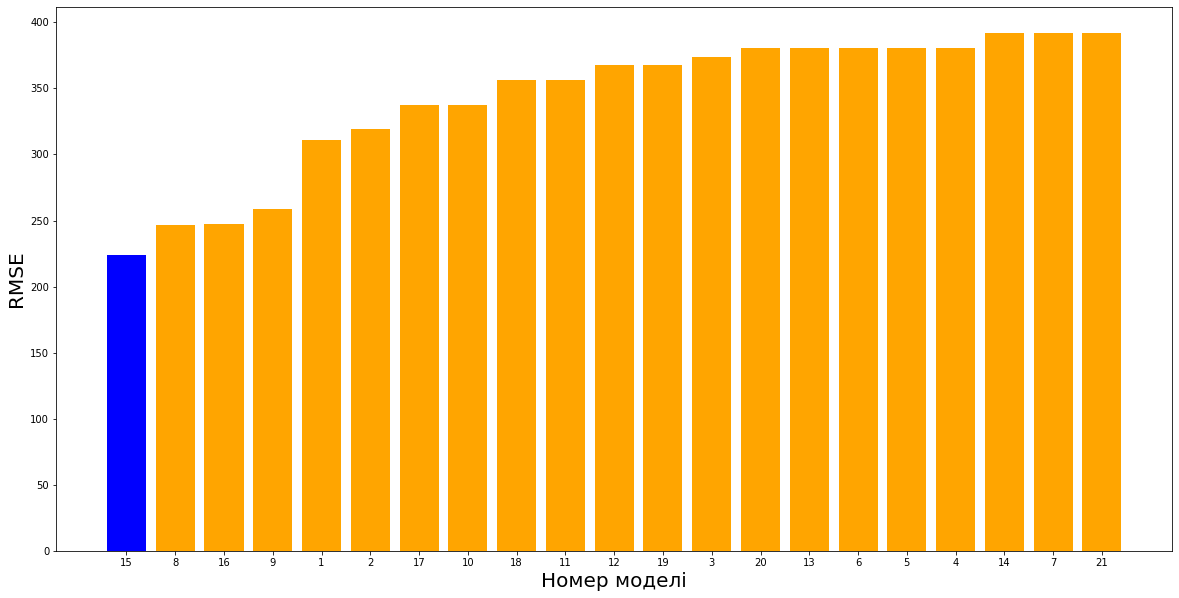

In [210]:
profit_color = [{r<224: 'blue', r>=224: 'orange'}[True] for r in dt_dict_for_plot['RMSE']]

fig,ax=plt.subplots(figsize=(20,10))

ax.bar(dt_dict_for_plot['ind'],dt_dict_for_plot['RMSE'], color=profit_color)
ax.set_xlabel('Номер моделі', fontsize=20)
ax.set_ylabel('RMSE' ,fontsize=20)

In [211]:
max_depth=4
min_samples_leaf_=0.08

dt = DecisionTreeRegressor(max_depth=max_depth_, min_samples_leaf=min_samples_leaf_, random_state=1)
model_dt=dt.fit(X_train_corn,y_train_corn)
y_dt_pred = model_dt.predict(X_train_corn)
rmse=np.sqrt(mean_squared_error(y_train_corn,y_dt_pred))
print('max_depth='+str(max_depth_)+' min_samples_leaf_='+str(min_samples_leaf_)+' RMSE='+str(rmse))

max_depth=4 min_samples_leaf_=0.08 RMSE=223.8970692233546


In [212]:
corn_results_train = pd.DataFrame(y_train_corn.copy())
corn_results_train['pred'] = pd.DataFrame(y_dt_pred)[0].values
corn_results_train

,Corn Price,pred
Date,,
2010-01-29,1230,1232.985075
2010-02-05,1210,1232.985075
2010-02-12,1220,1232.985075
2010-02-19,1240,1232.985075
2010-02-26,1240,1232.985075
...,...,...
2019-08-30,4100,4084.166667
2019-09-06,3600,4084.166667
2019-09-13,3550,4084.166667


Text(0, 0.5, 'Ціна на кукурудзу')

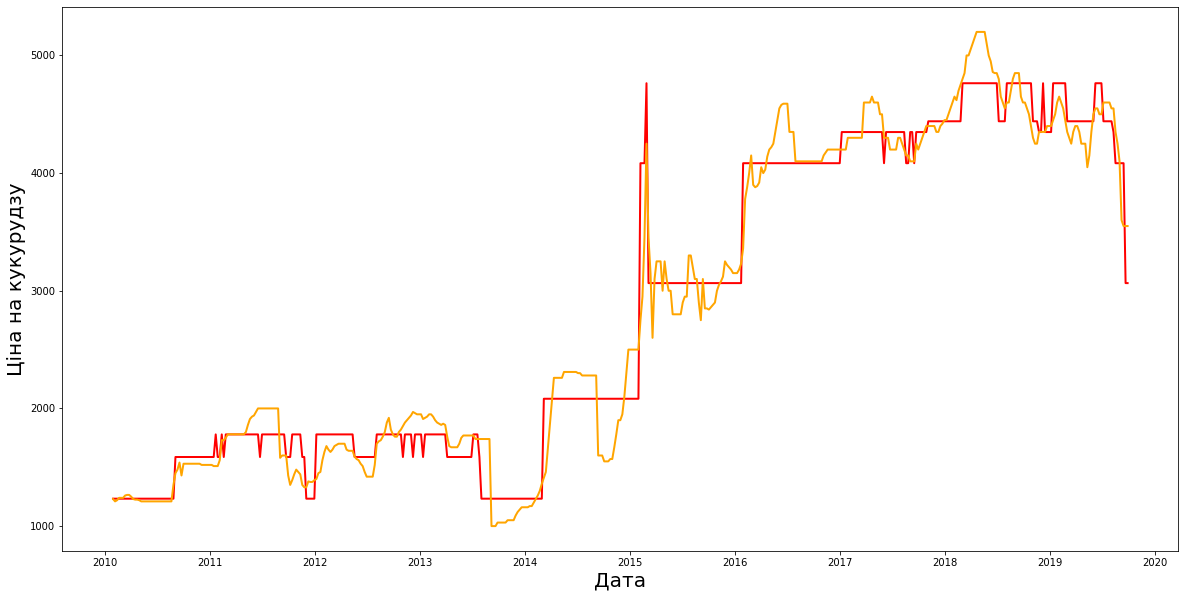

In [213]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(corn_results_train.index,corn_results_train['pred'], color='red', linewidth=2, label = 'Значення, підібране моделлю')
ax.plot(corn_results_train.index,corn_results_train['Corn Price'], color='orange', linewidth=2, label = 'Фактична ціна')

ax.set_xlabel('Дата', fontsize=20)
ax.set_ylabel('Ціна на кукурудзу' ,fontsize=20)

In [214]:
max_depth=4
min_samples_leaf_=0.08

dt = DecisionTreeRegressor(max_depth=max_depth_, min_samples_leaf=min_samples_leaf_, random_state=1)
model_dt=dt.fit(X_train_corn,y_train_corn)
y_dt_pred = model_dt.predict(X_test_corn)
rmse=np.sqrt(mean_squared_error(y_test_corn,y_dt_pred))
print('max_depth='+str(max_depth_)+' min_samples_leaf_='+str(min_samples_leaf_)+' RMSE='+str(rmse))

max_depth=4 min_samples_leaf_=0.08 RMSE=2354.4624311583716


In [215]:
corn_results_test = pd.DataFrame(y_test_corn.copy())
corn_results_test['pred'] = pd.DataFrame(y_dt_pred)[0].values
corn_results_test

,Corn Price,pred
Date,,
2019-10-04,3600,4084.166667
2019-10-11,3600,3065.102041
2019-10-18,3650,4084.166667
2019-10-25,3700,4440.465116
2019-11-01,3900,4440.465116
...,...,...
2022-01-28,7750,4763.840909
2022-02-04,7700,4763.840909
2022-02-11,7650,4763.840909


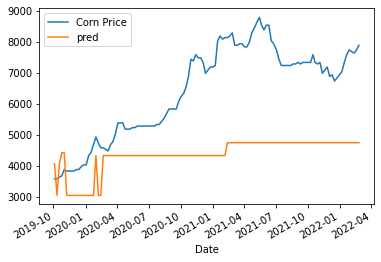

In [216]:
corn_results_test.plot()

In [217]:
corn_pred = pd.concat([corn_results_train, corn_results_test])

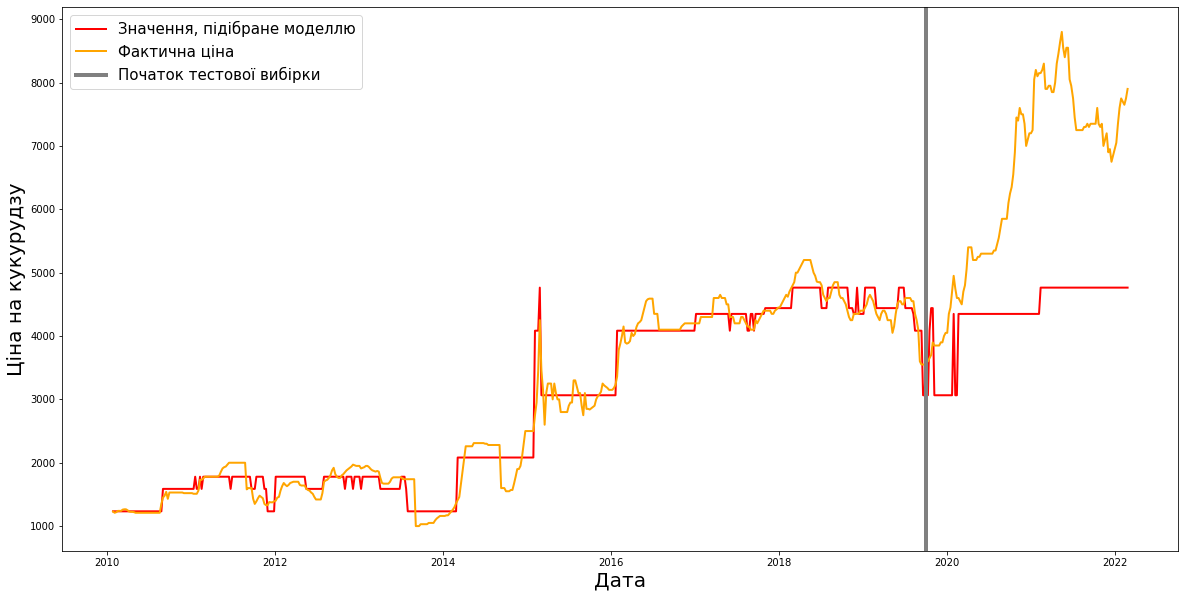

In [218]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(corn_pred.index,corn_pred['pred'], color='red', linewidth=2, label = 'Значення, підібране моделлю')
ax.plot(corn_pred.index,corn_pred['Corn Price'], color='orange', linewidth=2, label = 'Фактична ціна')

ax.set_xlabel('Дата', fontsize=20)
ax.set_ylabel('Ціна на кукурудзу' ,fontsize=20)

ax.axvline(x=datetime.datetime(2019, 10, 4),linewidth=4, color='grey', label = 'Початок тестової вибірки')

ax.legend(loc='upper left', fontsize=15)

#**CART - ячмінь**

In [219]:
max_depth = [2,3,4,5]
min_samples_leaf = [0.02,0.04,0.06,0.08,0.10,0.12,0.14,0.16,0.18,0.2]
i=0
dt_dict = {}

for max_depth_ in max_depth:
  for min_samples_leaf_ in min_samples_leaf:
    i=i+1
    dt = DecisionTreeRegressor(max_depth=max_depth_, min_samples_leaf=min_samples_leaf_, random_state=1)
    model_dt=dt.fit(X_train_barley,y_train_barley)
    y_dt_pred = model_dt.predict(X_train_barley)
    rmse=np.sqrt(mean_squared_error(y_train_barley,y_dt_pred))
    print('Модель '+str(i) + ': max_depth='+str(max_depth_)+' min_samples_leaf_='+str(min_samples_leaf_)+' RMSE='+str(rmse))
    dt_dict[i]=rmse


Модель 1: max_depth=2 min_samples_leaf_=0.02 RMSE=505.15716633253237
Модель 2: max_depth=2 min_samples_leaf_=0.04 RMSE=505.15716633253237
Модель 3: max_depth=2 min_samples_leaf_=0.06 RMSE=513.5707993930488
Модель 4: max_depth=2 min_samples_leaf_=0.08 RMSE=520.572876428257
Модель 5: max_depth=2 min_samples_leaf_=0.1 RMSE=533.203850865842
Модель 6: max_depth=2 min_samples_leaf_=0.12 RMSE=540.2307456792403
Модель 7: max_depth=2 min_samples_leaf_=0.14 RMSE=540.2307456792403
Модель 8: max_depth=2 min_samples_leaf_=0.16 RMSE=540.2307456792403
Модель 9: max_depth=2 min_samples_leaf_=0.18 RMSE=540.2307456792403
Модель 10: max_depth=2 min_samples_leaf_=0.2 RMSE=554.261458860535
Модель 11: max_depth=3 min_samples_leaf_=0.02 RMSE=337.0754625854202
Модель 12: max_depth=3 min_samples_leaf_=0.04 RMSE=341.06331278840946
Модель 13: max_depth=3 min_samples_leaf_=0.06 RMSE=384.579209006121
Модель 14: max_depth=3 min_samples_leaf_=0.08 RMSE=378.81586920373155
Модель 15: max_depth=3 min_samples_leaf_=0.1 

In [220]:
dt_dict_for_plot = pd.DataFrame()
dt_dict_for_plot['RMSE'] = list(dt_dict.values())
dt_dict_for_plot['ind'] = list(dt_dict.keys())
dt_dict_for_plot['ind'] = dt_dict_for_plot['ind'].astype(str)
dt_dict_for_plot = dt_dict_for_plot.sort_values(by='RMSE')
dt_dict_for_plot

,RMSE,ind
30,191.472708,31
31,218.074508,32
20,253.895825,21
21,261.521198,22
32,310.131640,33
22,315.019321,23
33,317.177713,34
23,317.177713,24
10,337.075463,11
11,341.063313,12


Text(0, 0.5, 'RMSE')

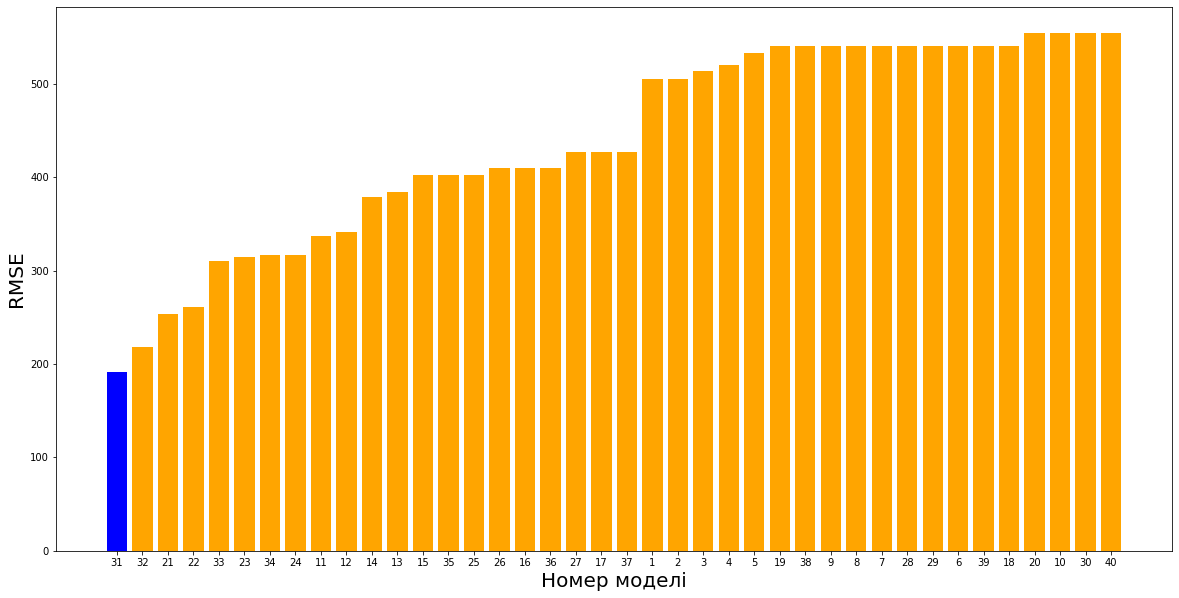

In [221]:
profit_color = [{r<192: 'blue', r>=192: 'orange'}[True] for r in dt_dict_for_plot['RMSE']]

fig,ax=plt.subplots(figsize=(20,10))

ax.bar(dt_dict_for_plot['ind'],dt_dict_for_plot['RMSE'], color=profit_color)
ax.set_xlabel('Номер моделі', fontsize=20)
ax.set_ylabel('RMSE' ,fontsize=20)

In [222]:
max_depth=5
min_samples_leaf_=0.02

dt = DecisionTreeRegressor(max_depth=max_depth_, min_samples_leaf=min_samples_leaf_, random_state=1)
model_dt=dt.fit(X_train_barley,y_train_barley)
y_dt_pred = model_dt.predict(X_train_barley)
rmse=np.sqrt(mean_squared_error(y_train_barley,y_dt_pred))
print('max_depth='+str(max_depth_)+' min_samples_leaf_='+str(min_samples_leaf_)+' RMSE='+str(rmse))

max_depth=5 min_samples_leaf_=0.02 RMSE=191.47270815851851


In [223]:
barley_results_train = pd.DataFrame(y_train_barley.copy())
barley_results_train['pred'] = pd.DataFrame(y_dt_pred)[0].values
barley_results_train

,Barley Price,pred
Date,,
2010-01-29,850,798.928571
2010-02-05,845,798.928571
2010-02-12,850,893.461538
2010-02-19,870,893.461538
2010-02-26,860,893.461538
...,...,...
2019-08-30,4300,3791.333333
2019-09-06,4000,3791.333333
2019-09-13,4000,3791.333333


Text(0, 0.5, 'Ціна на ячмінь')

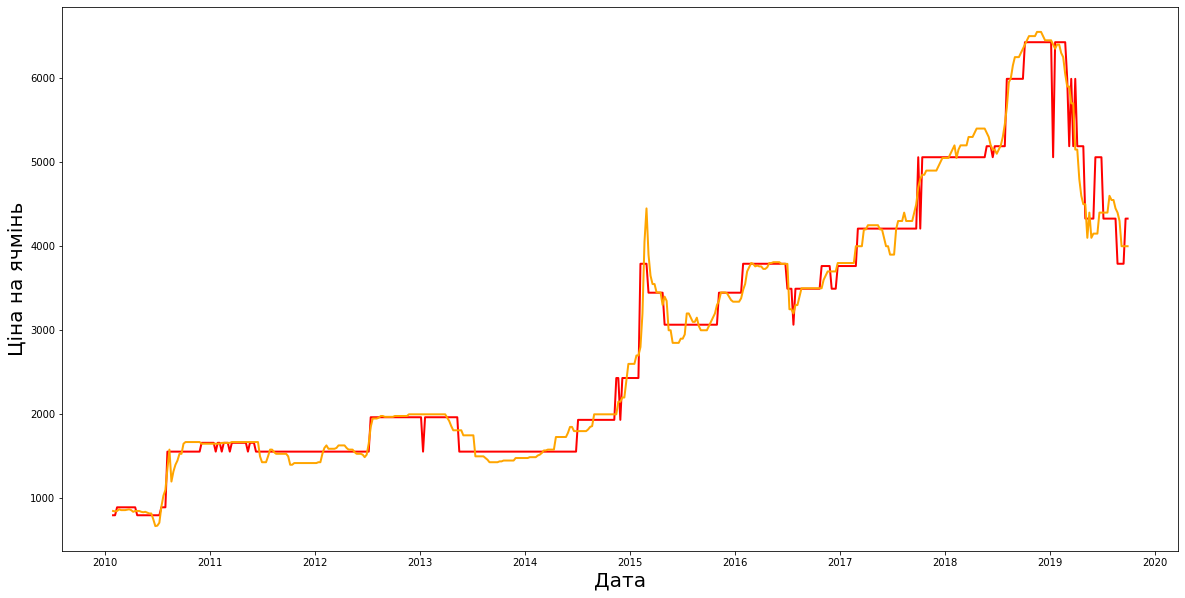

In [224]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(barley_results_train.index,barley_results_train['pred'], color='red', linewidth=2, label = 'Значення, підібране моделлю')
ax.plot(barley_results_train.index,barley_results_train['Barley Price'], color='orange', linewidth=2, label = 'Фактична ціна')

ax.set_xlabel('Дата', fontsize=20)
ax.set_ylabel('Ціна на ячмінь' ,fontsize=20)

In [225]:
max_depth = [2,3,4]
min_samples_leaf = [0.08,0.10,0.12,0.14,0.16,0.18,0.2]
i=0
dt_dict = {}

for max_depth_ in max_depth:
  for min_samples_leaf_ in min_samples_leaf:
    i=i+1
    dt = DecisionTreeRegressor(max_depth=max_depth_, min_samples_leaf=min_samples_leaf_, random_state=1)
    model_dt=dt.fit(X_train_barley,y_train_barley)
    y_dt_pred = model_dt.predict(X_train_barley)
    rmse=np.sqrt(mean_squared_error(y_train_barley,y_dt_pred))
    print('Модель '+str(i) + ': max_depth='+str(max_depth_)+' min_samples_leaf_='+str(min_samples_leaf_)+' RMSE='+str(rmse))
    dt_dict[i]=rmse


Модель 1: max_depth=2 min_samples_leaf_=0.08 RMSE=520.572876428257
Модель 2: max_depth=2 min_samples_leaf_=0.1 RMSE=533.203850865842
Модель 3: max_depth=2 min_samples_leaf_=0.12 RMSE=540.2307456792403
Модель 4: max_depth=2 min_samples_leaf_=0.14 RMSE=540.2307456792403
Модель 5: max_depth=2 min_samples_leaf_=0.16 RMSE=540.2307456792403
Модель 6: max_depth=2 min_samples_leaf_=0.18 RMSE=540.2307456792403
Модель 7: max_depth=2 min_samples_leaf_=0.2 RMSE=554.261458860535
Модель 8: max_depth=3 min_samples_leaf_=0.08 RMSE=378.81586920373155
Модель 9: max_depth=3 min_samples_leaf_=0.1 RMSE=402.5507828038817
Модель 10: max_depth=3 min_samples_leaf_=0.12 RMSE=409.56653377796687
Модель 11: max_depth=3 min_samples_leaf_=0.14 RMSE=427.3519076276323
Модель 12: max_depth=3 min_samples_leaf_=0.16 RMSE=540.2307456792403
Модель 13: max_depth=3 min_samples_leaf_=0.18 RMSE=540.2307456792403
Модель 14: max_depth=3 min_samples_leaf_=0.2 RMSE=554.261458860535
Модель 15: max_depth=4 min_samples_leaf_=0.08 RMS

In [226]:
dt_dict_for_plot = pd.DataFrame()
dt_dict_for_plot['RMSE'] = list(dt_dict.values())
dt_dict_for_plot['ind'] = list(dt_dict.keys())
dt_dict_for_plot['ind'] = dt_dict_for_plot['ind'].astype(str)
dt_dict_for_plot = dt_dict_for_plot.sort_values(by='RMSE')
dt_dict_for_plot

,RMSE,ind
14,317.177713,15
7,378.815869,8
15,402.550783,16
8,402.550783,9
16,409.566534,17
9,409.566534,10
10,427.351908,11
17,427.351908,18
0,520.572876,1
1,533.203851,2


Text(0, 0.5, 'RMSE')

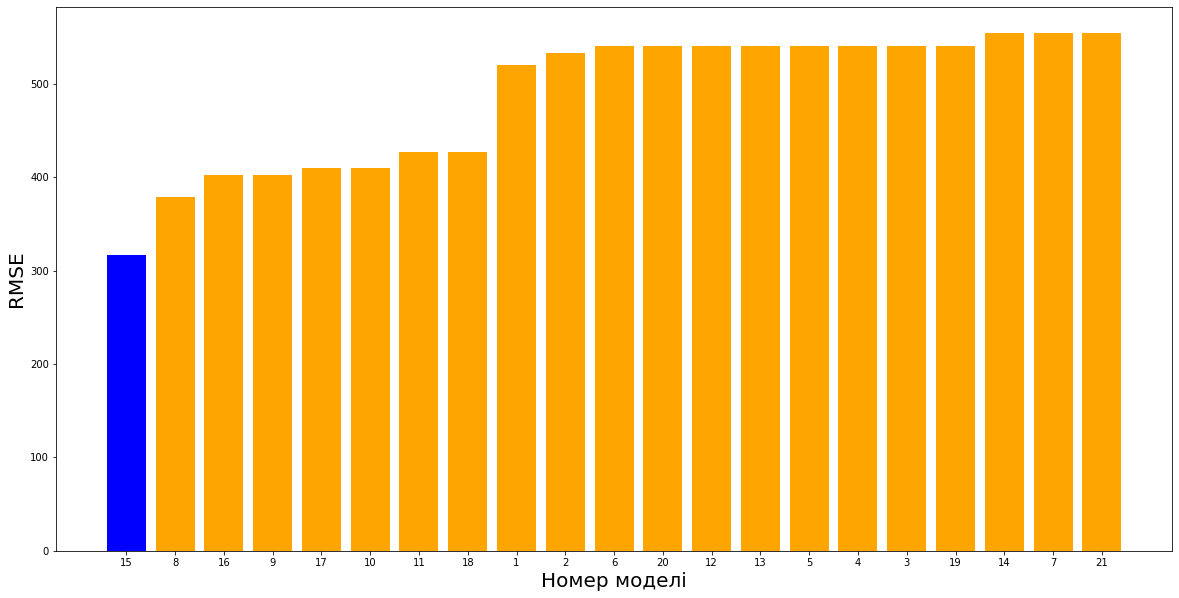

In [227]:
profit_color = [{r<318: 'blue', r>=318: 'orange'}[True] for r in dt_dict_for_plot['RMSE']]

fig,ax=plt.subplots(figsize=(20,10))

ax.bar(dt_dict_for_plot['ind'],dt_dict_for_plot['RMSE'], color=profit_color)
ax.set_xlabel('Номер моделі', fontsize=20)
ax.set_ylabel('RMSE' ,fontsize=20)

In [228]:
max_depth=4
min_samples_leaf_=0.08

dt = DecisionTreeRegressor(max_depth=max_depth_, min_samples_leaf=min_samples_leaf_, random_state=1)
model_dt=dt.fit(X_train_barley,y_train_barley)
y_dt_pred = model_dt.predict(X_train_barley)
rmse=np.sqrt(mean_squared_error(y_train_barley,y_dt_pred))
print('max_depth='+str(max_depth_)+' min_samples_leaf_='+str(min_samples_leaf_)+' RMSE='+str(rmse))

max_depth=4 min_samples_leaf_=0.08 RMSE=317.1777125709248


In [229]:
barley_results_train = pd.DataFrame(y_train_barley.copy())
barley_results_train['pred'] = pd.DataFrame(y_dt_pred)[0].values
barley_results_train

,Barley Price,pred
Date,,
2010-01-29,850,1055.000000
2010-02-05,845,1055.000000
2010-02-12,850,1055.000000
2010-02-19,870,1055.000000
2010-02-26,860,1055.000000
...,...,...
2019-08-30,4300,3676.122449
2019-09-06,4000,3676.122449
2019-09-13,4000,3676.122449


Text(0, 0.5, 'Ціна на ячмінь')

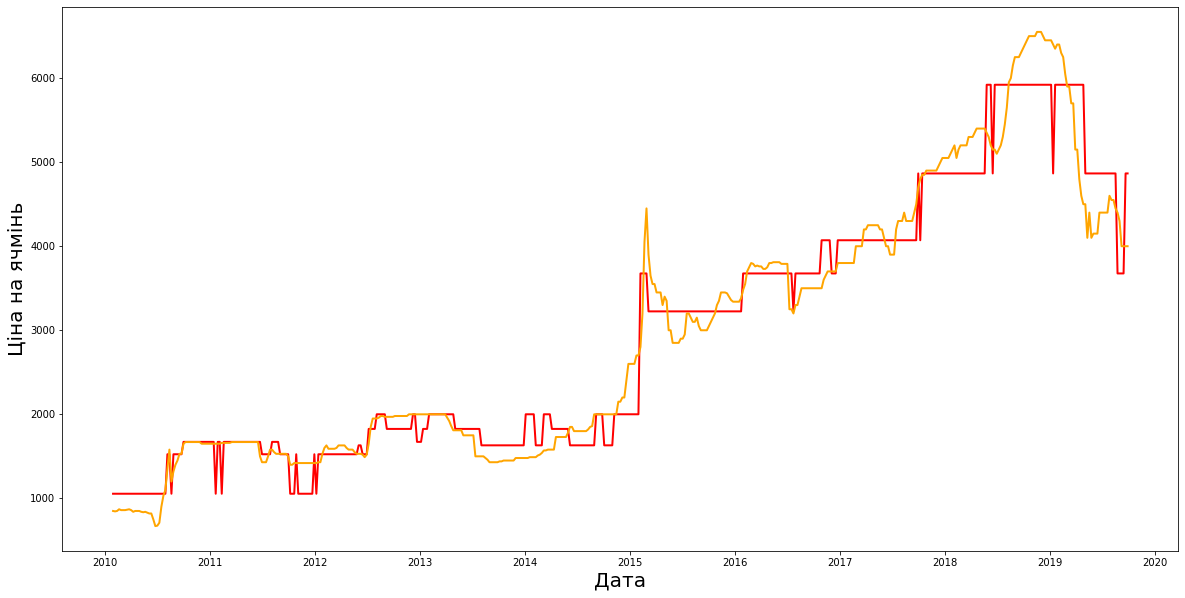

In [230]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(barley_results_train.index,barley_results_train['pred'], color='red', linewidth=2, label = 'Значення, підібране моделлю')
ax.plot(barley_results_train.index,barley_results_train['Barley Price'], color='orange', linewidth=2, label = 'Фактична ціна')

ax.set_xlabel('Дата', fontsize=20)
ax.set_ylabel('Ціна на ячмінь' ,fontsize=20)

In [231]:
max_depth=4
min_samples_leaf_=0.08

dt = DecisionTreeRegressor(max_depth=max_depth_, min_samples_leaf=min_samples_leaf_, random_state=1)
model_dt=dt.fit(X_train_barley,y_train_barley)
y_dt_pred = model_dt.predict(X_test_barley)
rmse=np.sqrt(mean_squared_error(y_test_barley,y_dt_pred))
print('max_depth='+str(max_depth_)+' min_samples_leaf_='+str(min_samples_leaf_)+' RMSE='+str(rmse))

max_depth=4 min_samples_leaf_=0.08 RMSE=1162.4640951466124


In [232]:
barley_results_test = pd.DataFrame(y_test_barley.copy())
barley_results_test['pred'] = pd.DataFrame(y_dt_pred)[0].values
barley_results_test

,Barley Price,pred
Date,,
2019-10-04,4000,4866.037736
2019-10-11,4000,3224.791667
2019-10-18,4000,4866.037736
2019-10-25,4100,4866.037736
2019-11-01,4100,4866.037736
...,...,...
2022-01-28,7600,5921.276596
2022-02-04,7700,5921.276596
2022-02-11,7600,5921.276596


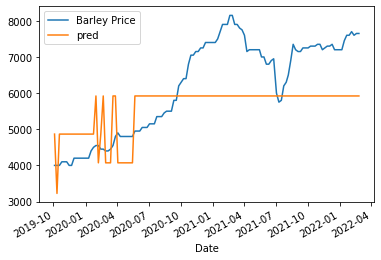

In [233]:
barley_results_test.plot()

In [234]:
barley_pred = pd.concat([barley_results_train, barley_results_test])

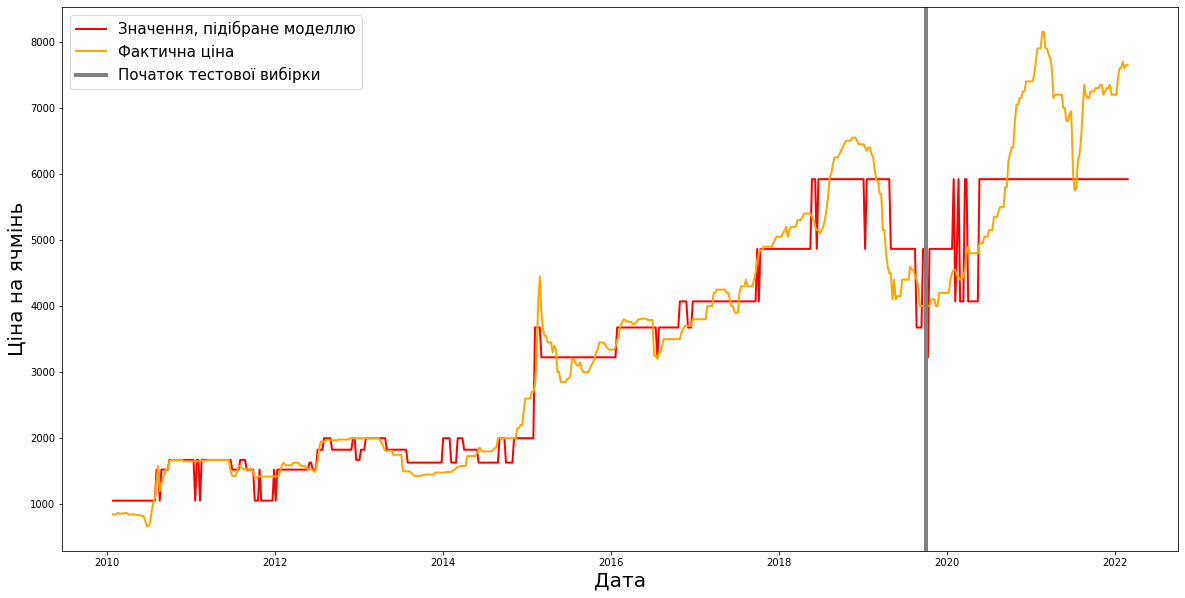

In [237]:
fig,ax=plt.subplots(figsize=(20,10))

ax.plot(barley_pred.index,barley_pred['pred'], color='red', linewidth=2, label = 'Значення, підібране моделлю')
ax.plot(barley_pred.index,barley_pred['Barley Price'], color='orange', linewidth=2, label = 'Фактична ціна')

ax.set_xlabel('Дата', fontsize=20)
ax.set_ylabel('Ціна на ячмінь' ,fontsize=20)

ax.axvline(x=datetime.datetime(2019, 10, 4),linewidth=4, color='grey', label = 'Початок тестової вибірки')

ax.legend(loc='upper left', fontsize=15)